In [468]:
import numpy as np
import random
lrate = 1

In [469]:
def activation_fn(x):
    return 1 / (1 + np.exp(-x))

In [470]:
def der(x):
    return  np.exp(-x) / (1 + np.exp(-x))**2

Part 1



I followed the tasks specified in the homework spec to get the model to converge with SSE <= 0.01 in <1000 epochs. If code gets stuck, and theres no convergence,I rerun it with new training set until the SSE criteria is met. Finally  I will plot SSE values to see convergence and use a color map to visualize output differences.

In [471]:
#STEP 2
patterns = []
for i in range(8):
    pattern = np.round(np.random.rand(1,8))
    patterns.append(pattern)

patterns_array = np.concatenate(patterns, axis=0)
patterns = np.array(patterns)
patterns = np.squeeze(patterns)
print(patterns_array)
print(np.shape(patterns))

[[0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0. 1. 1.]
 [1. 1. 1. 1. 0. 0. 1. 1.]
 [1. 0. 0. 0. 1. 0. 1. 1.]
 [1. 0. 0. 1. 0. 1. 1. 0.]]
(8, 8)


In [472]:
#STEP 3
output =0
outputCounter=[]
for i in range(patterns.shape[0]):
    row = patterns[i,:].ravel()  
    ones_count = np.count_nonzero(row == 1) 
    if np.mod(ones_count, 2) == 0:
        print(f"Row {i} has {ones_count} ones. Therefore it is even.")
        output = 1 
        outputCounter.append(output)
        print(output)
        
        
    else:
        print(f"Row {i} has {ones_count} ones. Therefore it is odd ")
        output
        outputCounter.append(output)
        print(output)

    output=0
print("The output array is",outputCounter)

desired_output = np.array(outputCounter)
print(desired_output.shape)
    

Row 0 has 3 ones. Therefore it is odd 
0
Row 1 has 4 ones. Therefore it is even.
1
Row 2 has 1 ones. Therefore it is odd 
0
Row 3 has 3 ones. Therefore it is odd 
0
Row 4 has 4 ones. Therefore it is even.
1
Row 5 has 6 ones. Therefore it is even.
1
Row 6 has 4 ones. Therefore it is even.
1
Row 7 has 4 ones. Therefore it is even.
1
The output array is [0, 1, 0, 0, 1, 1, 1, 1]
(8,)


In [473]:
#STEP 4
w_fg = np.random.rand(8, 3) - 0.5
w_gh = np.random.rand(3,1) - 0.5

In [474]:
#STEP 5
epoch = 0
sseArr=[]
count=0
outputact=[]
traceVal = -1
while epoch < 1001:
    if epoch%10 == 0:
        print("Epoch value is",epoch)
        print("SSE value is",traceVal)
    if epoch == 1000:
        print ( "WARNING: Model did not converge")
    hiddenLayer = np.matmul(patterns, w_fg)
    hiddenLayer = activation_fn(hiddenLayer)
    outputLayer = np.matmul(hiddenLayer, w_gh)
    outputLayer = activation_fn(outputLayer)
    #print(outputLayer.shape)
    desireReshape = desired_output.reshape(8,1)
    outputError = desireReshape  - outputLayer
    #print("output layer", outputLayer.shape)
    #print("desired output", desired_output.shape)
    #print("outputerror", outputError.shape)
    for i in range(8):
        wf_fg = hiddenLayer[i]
        e= outputError[i]
        wg_gh = outputLayer[i]
        chunkOne = np.matmul(np.diag(der(wf_fg)), w_gh)
        derTwo = der(wg_gh).reshape(1,1)
        patternReshape= patterns[i].reshape(8,1)
        chunkTwo = np.matmul(patternReshape,derTwo)
        diff = lrate * np.matmul(chunkOne,(np.matmul(chunkTwo, np.diag(e))).T)
        transposedDiff= diff.T
        #print( transposedDiff.shape)
        w_fg += transposedDiff
        chunkThree = np.diag(der(wg_gh))
        #print(chunkThree.shape)
        errorReshape= e.reshape(1,1)
        hiddenReshape = wf_fg.reshape(3,1)
        chunkFour =np.matmul(hiddenReshape, errorReshape )
        diffTwo = lrate*(chunkThree*chunkFour)
        w_gh += diffTwo
    epoch+=1
    hiddenLayer = np.matmul(patterns, w_fg)
    hiddenLayer = activation_fn(hiddenLayer)
    outputLayer = np.matmul(hiddenLayer, w_gh)
    outputLayer = activation_fn(outputLayer)
    #print(outputLayer)
    #print(outputLayer.shape)
    desireReshape = desired_output.reshape(8,1)
    outputError = desireReshape  - outputLayer
    #print(outputError)
    sse = outputError.T*outputError 
    #print(sse)
    #break
    traceVal = np.trace(sse)
    sseArr.append(traceVal)
    if traceVal <0.01:
        break
    
    
                         

 
    
        
        
        
        
     

Epoch value is 0
SSE value is -1
Epoch value is 10
SSE value is 1.353169583301924
Epoch value is 20
SSE value is 0.8590370538759877
Epoch value is 30
SSE value is 0.5028546579308818
Epoch value is 40
SSE value is 0.26857392129402147
Epoch value is 50
SSE value is 0.14384014647391902
Epoch value is 60
SSE value is 0.08156254010093583
Epoch value is 70
SSE value is 0.049575799379527836
Epoch value is 80
SSE value is 0.032178387978514605
Epoch value is 90
SSE value is 0.02208790699519365
Epoch value is 100
SSE value is 0.01587448151248538
Epoch value is 110
SSE value is 0.01184454893002124


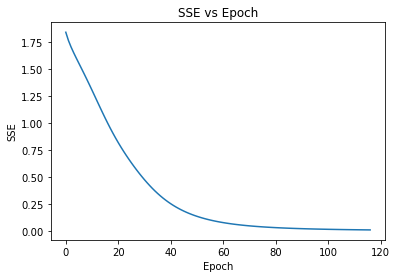

In [475]:
import matplotlib.pyplot as plt

# After the loop finishes, plot the SSE values
plt.plot(sseArr)
plt.title("SSE vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("SSE")
plt.show()



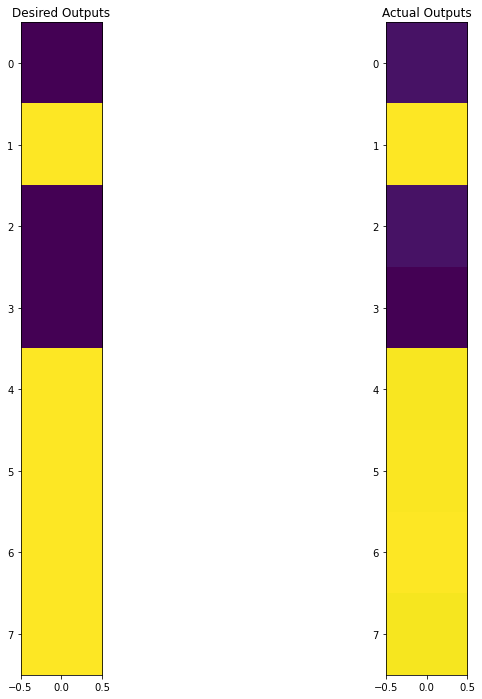

Desired Outputs: [0 1 0 0 1 1 1 1]
Actual Outputs: [[0.06026655]
 [0.98465593]
 [0.05950977]
 [0.01319157]
 [0.97362993]
 [0.97917088]
 [0.98431421]
 [0.97046506]]


In [476]:
fig, ax2 = plt.subplots(1, 2, figsize = (12,12))
#print(output_activation)
desired = np.expand_dims(desired_output, axis = 0)
ax2[0].imshow( desireReshape)
ax2[0].set_title("Desired Outputs")
ax2[1].imshow(outputLayer)
ax2[1].set_title("Actual Outputs")

#plt.colorbar(desired)
plt.show()

print("Desired Outputs:", desired_output)
print("Actual Outputs:", outputLayer)

Part 2


To test the model created above and its generalization capabilities, we can use a new set of patterns and run them through the model without updating the weights. The sum of squared errors of the new patterns is quite a bit higher, fluctuating between 1- 4 in its value, which showcases us that this model is not the most generalizable. The model is not fully able to make correct parity judgements on its input unis, and this is even showcased by the maps, which showcase the lack of match between desired and actual outputs

In [477]:
output =0
outputCounter=[]

patternNew = []
for i in range(8):
    pattern = np.round(np.random.rand(1,8))
    patternNew.append(pattern)

patterns_array = np.concatenate(patternNew, axis=0)
patternNew = np.array(patternNew)
patternNew = np.squeeze(patternNew )


desired_output = np.array([0] * patternNew.shape[0])

for i in range(patternNew.shape[0]):
    num = 0
    for j in range(patternNew.shape[1]):
        if patternNew[i,j] == 1:
            num+=1
        ans = np.mod(num,2)
        if ans ==0:
            desired_output[i] = 1
        else:
            desired_output[i] = 0
            

desireReshape = desired_output.reshape(8,1)


hiddenLayer = np.matmul(patternNew, w_fg)
hiddenLayer = activation_fn(hiddenLayer)
outputLayer = np.matmul(hiddenLayer, w_gh)
outputLayer = activation_fn(outputLayer)
outputError = desireReshape   - outputLayer
print(outputError.shape)
print(outputLayer.shape)


(8, 1)
(8, 1)


SSE of the newly-generated random patterns: 2.192657010493145


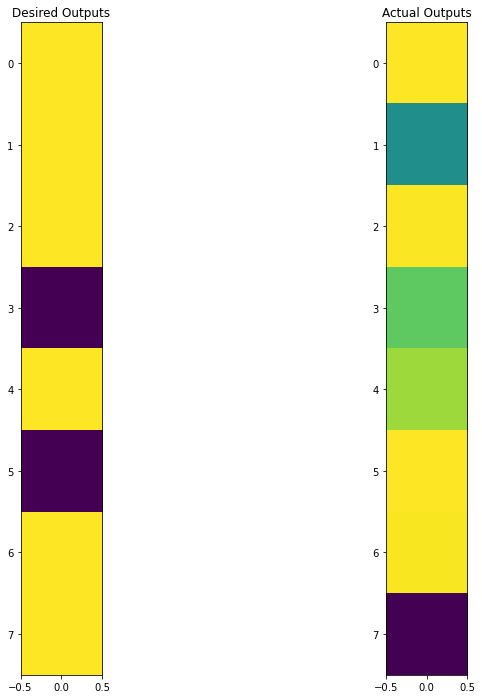

Desired Outputs: [1 1 1 0 1 0 1 1]
Actual Outputs: [[0.98326323]
 [0.66884768]
 [0.97917088]
 [0.828284  ]
 [0.89166288]
 [0.98387327]
 [0.97830947]
 [0.35500946]]


In [478]:
sse= np.trace(np.matmul(outputError.T,outputError))


print("SSE of the newly-generated random patterns:", sse)

fig, ax2 = plt.subplots(1, 2, figsize = (12,12))
desired = np.expand_dims(desired_output, axis = 0)
ax2[0].imshow(desireReshape)
ax2[0].set_title("Desired Outputs")
ax2[1].imshow(outputLayer)
ax2[1].set_title("Actual Outputs")

plt.show()

print("Desired Outputs:", desired_output)
print("Actual Outputs:", outputLayer)